# Decision Trees

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [14]:
# load the data set
penguin = pd.read_csv('penguins_size.csv')
# Drop rows with any NaN values
penguin = penguin.dropna()

In [15]:
# prepare dataset
feature_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguin[feature_columns]

le = LabelEncoder()
penguin['species_encoded'] = le.fit_transform(penguin['species'])
target_names = le.classes_
y = penguin['species_encoded']

In [16]:
# build and train the model
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)

In [17]:
# print out the learned decision rules as a text
tree_rules = export_text(decision_tree, feature_names=feature_columns)
print(tree_rules)

|--- flipper_length_mm <= 206.50
|   |--- culmen_length_mm <= 43.35
|   |   |--- class: 0
|   |--- culmen_length_mm >  43.35
|   |   |--- class: 1
|--- flipper_length_mm >  206.50
|   |--- culmen_depth_mm <= 17.65
|   |   |--- class: 2
|   |--- culmen_depth_mm >  17.65
|   |   |--- class: 1



In [18]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)

In [19]:
# load the data set
penguin = pd.read_csv('penguins_size.csv')

# prepare dataset
columns = ['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguin = penguin[columns].dropna()

le = LabelEncoder()
penguin['species_encoded'] = le.fit_transform(penguin['species'])
target_names = le.classes_

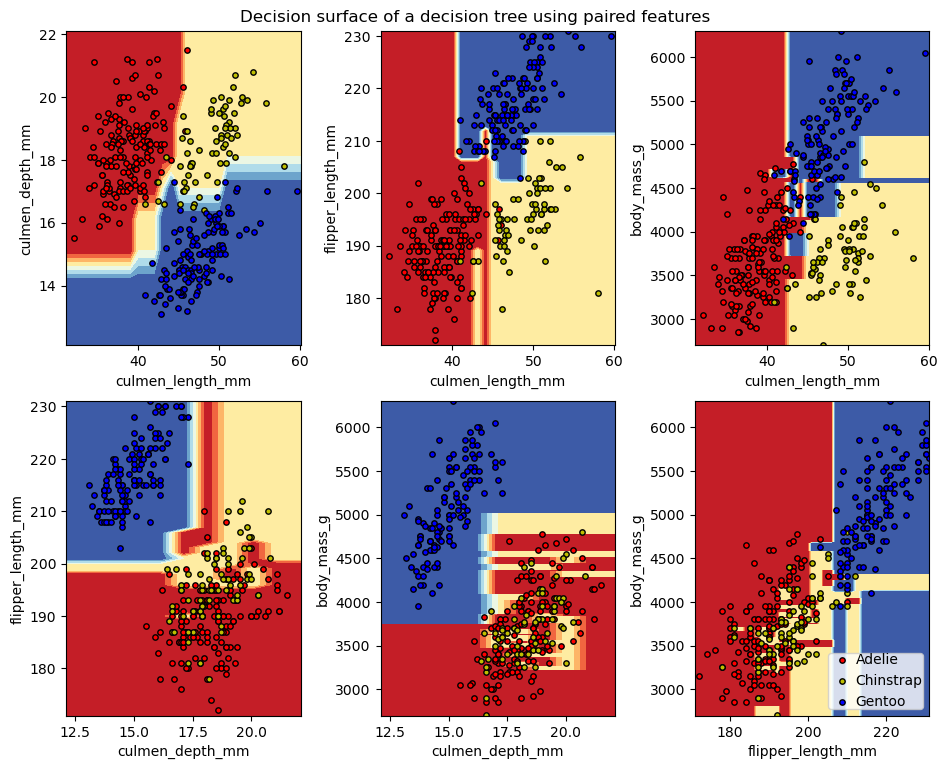

In [20]:
# Plot the decision surface of a decision tree on the iris dataset
#
# Parameters
feature_names = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
n_classes = len(np.unique(penguin['species_encoded']))
plot_colors = "ryb"
plot_step = 1


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = penguin[[feature_names[pair[0]], feature_names[pair[1]]]].values
    y = penguin['species_encoded'].values

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=le.classes_[i],
            #cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight");

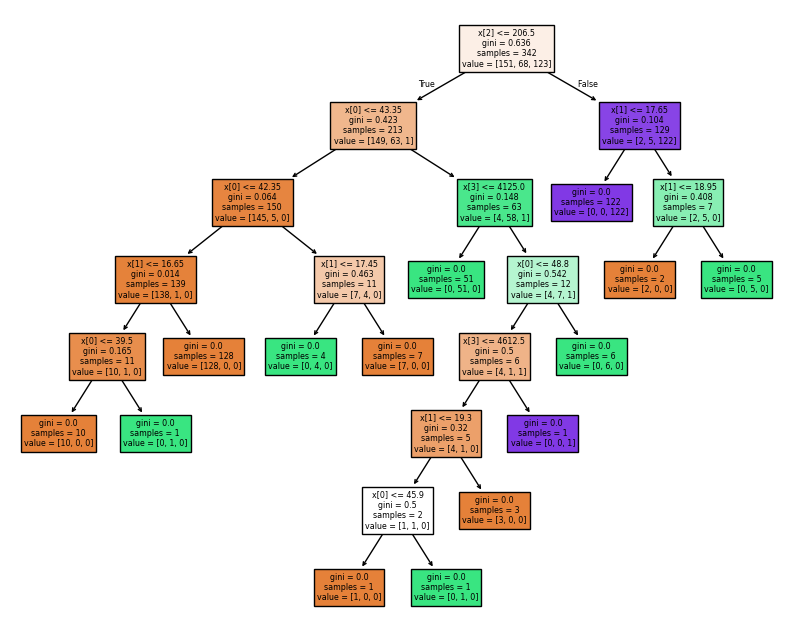

In [21]:
# plot the decision tree itself
clf = DecisionTreeClassifier().fit(penguin[feature_names], penguin['species_encoded'])
t = plot_tree(clf, filled=True)

In [22]:
# --->>> Your Turn <<<---
# Experiment with changing the following:
# - use a different subset of the data for training
# - max_depth
# - min_samples_leaf
# - criterion
# - splitter
#
# see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html